In [1]:
import networkx as nx
import sys
import os

sys.path.append("/workspaces/word-ladder/wordladder")
os.chdir('/workspaces/word-ladder/wordladder')
from ladder import WordLadder

l = WordLadder()


In [2]:
ng = nx.DiGraph(l.get_graph(3))

In [3]:
import csv
def common_words_by_length_and_frequency(word_length):
    with open('resources/common.frequency.csv', 'r', encoding='utf-8') as dictionary:
        reader = csv.reader(dictionary, delimiter=" ")
        wordlist = [(word, int(frequency)) for word, frequency in reader if len(word) == word_length]
        wordlist = sorted(wordlist, key=lambda x: x[1], reverse=True)
        return [word for word, _ in wordlist]


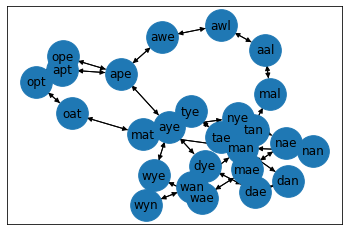

In [3]:
subgraphs = [p for p in nx.all_shortest_paths(ng, 'ape', 'man')]
lastgraph = nx.subgraph(ng, subgraphs[0])
uniongraph = None
for x in range(1, len(subgraphs)):
    uniongraph = nx.compose(lastgraph, nx.subgraph(ng, subgraphs[x]))
    lastgraph = uniongraph

nx.draw_networkx(uniongraph, node_size=1000)

In [15]:
word_length = 7
words = common_words_by_length_and_frequency(word_length)[:100]
wordladders = {}
count = 0

total = len(words)** 2

def get_distance(a, b):
    diff_count = 0;
    for x in range (len(a)): #a and b should be same length at this point
        if a[x] != b[x]:
            diff_count = diff_count + 1                                        
    return diff_count

word_pairs = set()
for start_word in words:
    for end_word in words:
        count += 1
        if get_distance(start_word, end_word) > word_length - 1:
            word_pairs.add((start_word, end_word))
        if count % 1000 == 0:
            sys.stdout.write(f"\r{count} out of {total} pairs done.")
            sys.stdout.flush()
len(word_pairs)

10000 out of 10000 pairs done.

5640

In [16]:
from networkx import NetworkXNoPath

ng = nx.DiGraph(l.get_graph(word_length))
count = 0
total = len(word_pairs)
for start_word, end_word in word_pairs:
        count += 1
        try:
            shortest_paths = list(nx.all_shortest_paths(ng, start_word, end_word))
            if shortest_paths and len(shortest_paths[0])> word_length - 1:
                wordladders[(start_word, end_word)] = shortest_paths
        except NetworkXNoPath:
            pass
        if count % 1000 == 0:
            sys.stdout.write(f"\r{count} out of {total} pairs done. Found {len(wordladders.keys())} paths")
            sys.stdout.flush()

5600 out of 5640 pairs done. Found 0 paths

In [17]:
l.get_graph(word_length)

{'cascara': ['mascara'],
 'sheaved': [],
 'requiem': [],
 'cellule': [],
 'farrago': [],
 'bullion': ['billion', 'mullion', 'cullion', 'rullion'],
 'inverse': [],
 'knicker': ['knocker', 'snicker', 'knacker'],
 'potence': ['potency'],
 'soursop': [],
 'fainter': ['painter'],
 'vihuela': [],
 'assured': ['assumed', 'assurer'],
 'twitchy': [],
 'cypsela': [],
 'whereto': ['thereto'],
 'pharynx': [],
 'gravely': ['bravely'],
 'rebound': ['rewound', 'resound', 'redound', 'refound'],
 'subsume': [],
 'strette': ['stretto', 'stretti'],
 'squidgy': ['squidge'],
 'albumen': ['albumin'],
 'affinal': ['affixal'],
 'cumulus': ['tumulus'],
 'ergates': [],
 'gregale': [],
 'steamer': ['stemmer', 'stealer'],
 'shriven': ['shrivel', 'shriver', 'thriven', 'striven'],
 'analyse': ['analyst', 'analyze'],
 'telford': [],
 'lullaby': [],
 'rackett': ['rackety'],
 'reprise': ['reprice'],
 'footpad': [],
 'lentigo': [],
 'bronchi': [],
 'femoral': ['nemoral'],
 'dasheen': [],
 'sinuate': ['situate'],
 'mans

In [14]:
import json
ladder_dict = {f'{k[0]}-{k[1]}':v for k, v in wordladders.items()}
json.dumps(ladder_dict)
with open(f'ladder-common-{word_length}.json', "w") as output:
    output.write(json.dumps(ladder_dict))